<a href="https://colab.research.google.com/github/sowndarya13/OnebillTraining/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install Pillow==9.0.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

! apt install tesseract-ocr
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import os
import PIL
from google.colab.patches import cv2_imshow

In [ ]:
def display_img(cvImg):
   cvImg = cv2.cvtColor(cvImg, cv2.COLOR_BGR2RGB)
   plt.figure(figsize=(10,8))
   plt.imshow(cvImg)
   plt.axis('off')
   plt.show()


In [ ]:
# Drive Mounting

#from google.colab import drive
#drive.mount('/content/drive')

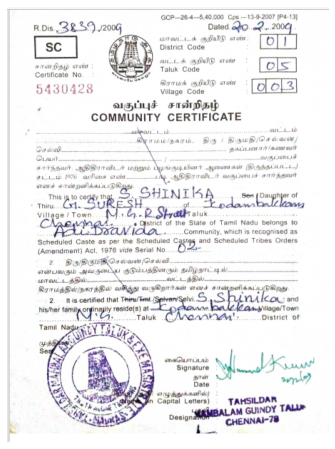

In [ ]:
baseImg = cv2.imread('54.png')

#Declare image size, width height and chanel
baseH, baseW, baseC = baseImg.shape

display_img(baseImg)

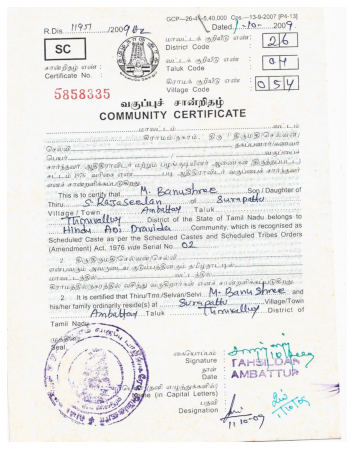

In [ ]:
img2 = cv2.imread('31.jpg')

display_img(img2)

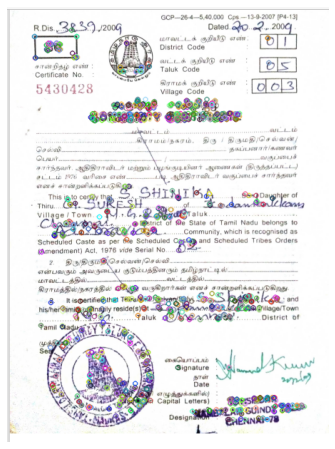

In [ ]:
orb = cv2.ORB_create(1000)

kp, des = orb.detectAndCompute(baseImg, None)
imgKp = cv2.drawKeypoints(baseImg,kp, None)

display_img(imgKp)

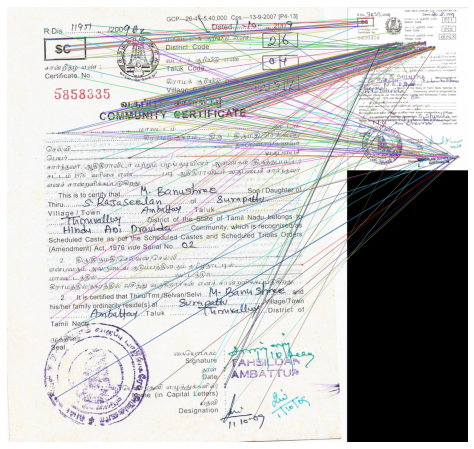

In [ ]:
PER_MATCH = 0.25

#Detect keypoint on img2
kp1, des1 = orb.detectAndCompute(img2, None)

#Init BF Matcher, find the matches points of two images
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = list(bf.match(des1, des))

#Select top 30% best matcher 
matches.sort(key=lambda x: x.distance)
best_matches = matches[:int(len(matches)*PER_MATCH)]

#Show match img  
imgMatch = cv2.drawMatches(img2, kp1, baseImg, kp, best_matches,None, flags=2)
display_img(imgMatch)

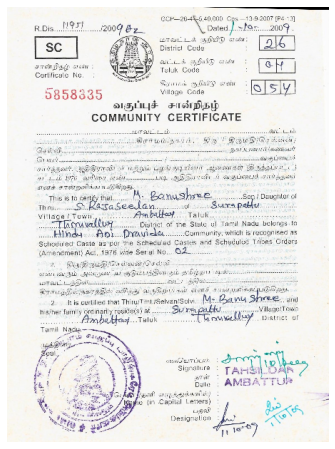

In [ ]:
srcPoints = np.float32([kp1[m.queryIdx].pt for m in best_matches]).reshape(-1,1,2)
dstPoints = np.float32([kp[m.trainIdx].pt for m in best_matches]).reshape(-1,1,2)


#Find Homography of two images
matrix_relationship, _ = cv2.findHomography(srcPoints, dstPoints,cv2.RANSAC, 5.0)

#Transform the image to have the same structure as the base image
img_final = cv2.warpPerspective(img2, matrix_relationship, (baseW, baseH))

display_img(img_final)


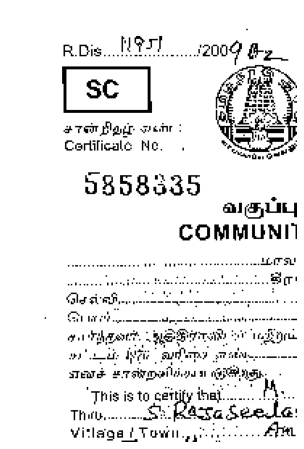

69   57
37   40   64   34
69   57
37   40   64   34


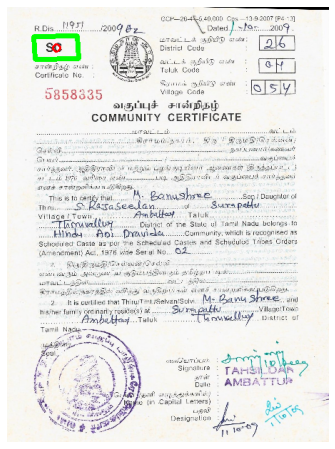

In [ ]:


import cv2
import io
import os
import numpy as np

img = img_final
gray = cv2.cvtColor(img_final, cv2.COLOR_BGR2GRAY)

roi = gray[0:300, 0:200]
_, threshold = cv2.threshold(roi, 200, 255, cv2.THRESH_BINARY)

display_img(threshold)

contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    if (cv2.contourArea(cnt) > 2000) and (cv2.contourArea(cnt) < 3000):

        approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True)
        cv2.drawContours(img, [approx], 0, (0, 255, 0), 5)

        (x, y, w, h) = cv2.boundingRect(approx)
        xcenter = (x+x+w)//2
        ycenter = (y+y+h)//2
        print(xcenter, " ", ycenter)
        print(x, " ", y, " ", w, " ", h)
        img = cv2.circle(img, (xcenter, ycenter), 5, [0, 0, 255], 2)

xcenter = (x+x+w)//2
ycenter = (y+y+h)//2

print(xcenter, " ", ycenter)
print(x, " ", y, " ", w, " ", h)
display_img(img)




-----------------------NAME OF DISTRICT---------------------------


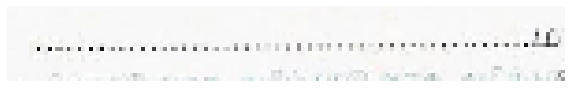

In [ ]:
v1 = h - 32
v2 = w - 64 
xc = xcenter
yc = ycenter
xs = xc-35
ys = yc+110
f1 = img[ys:ys+20,xs:xs+150]
print("-----------------------NAME OF DISTRICT---------------------------")
display_img(f1)

-----------------------NAME OF VATTAM ---------------------------


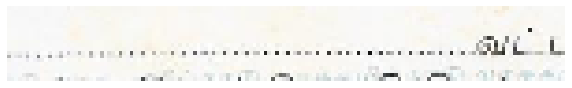

In [ ]:
xs = xc+172
ys = yc+105+v1
f2 = img[ys:ys+20,xs:xs+150]
print("-----------------------NAME OF VATTAM ---------------------------")
display_img(f2)

-----------------------NAME OF VILLAGE ---------------------------


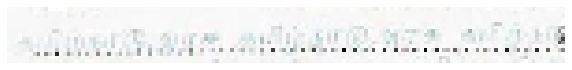

In [ ]:
xs = xc-35
ys = yc+120+v1
f3 = img[ys:ys+15,xs:xs+150]
print("-----------------------NAME OF VILLAGE ---------------------------")
display_img(f3)

-----------------------NAME OF HOLDER ---------------------------


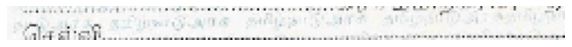

In [ ]:
xs = xc-35
ys = yc+130+v1
f3 = img[ys:ys+15,xs:xs+250]
print("-----------------------NAME OF HOLDER ---------------------------")
display_img(f3)

-----------------------NAME OF FATHER ---------------------------


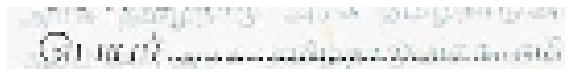

In [ ]:
xs = xc-35
ys = yc+145+v1
f3 = img[ys:ys+15,xs:xs+135]
print("-----------------------NAME OF FATHER ---------------------------")
display_img(f3)

-----------------------RELIGION & CASTE---------------------------


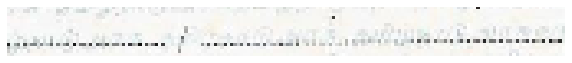

In [ ]:
xs = xc+100
ys = yc+145+v1
f3 = img[ys:ys+15,xs:xs+170]
print("-----------------------RELIGION & CASTE---------------------------")
display_img(f3)

NAME


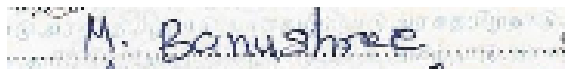

In [ ]:
xs = xc+83
ys = yc+195+v1
f1 = img[ys:ys+20,xs:xs+180]
print("NAME")
display_img(f1)

Community


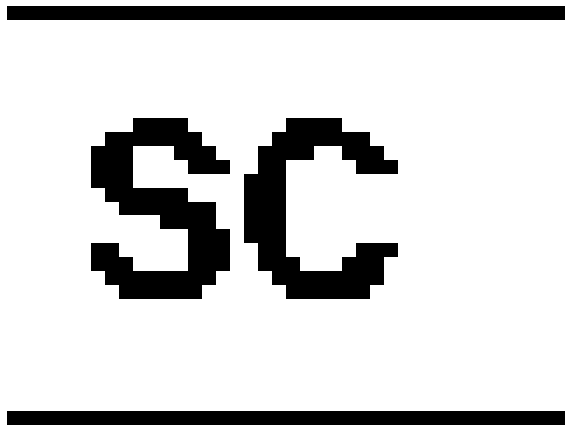

In [ ]:
xs=xc-20
ys=yc-15
f2=threshold[ys:ys+30,xs:xs+40]
print("Community")
display_img(f2)

In [ ]:
text=pytesseract.image_to_string(f2, config='--oem 1 --psm 6')
print(text)

sc



Certificate Number


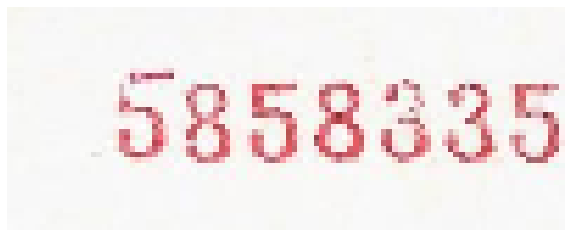

In [ ]:
xs=xc-35
ys=yc+45
f3= img[ys:ys+40,xs:xs+100]
print("Certificate Number")
display_img(f3)

In [ ]:
text=pytesseract.image_to_string(f3, config='--oem 1 --psm 6')
print(text)

5858335



FATHER NAME


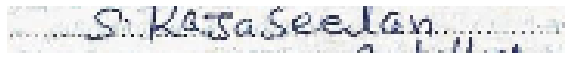

In [ ]:
xs=xc
ys=yc+215+v1
f4 = img[ys:ys+15,xs:xs+180]
print("FATHER NAME")
display_img(f4)

CASTE


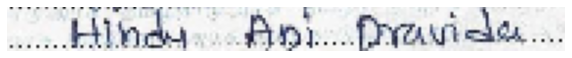

In [ ]:
xs=xc-25
ys=yc+250+v1
f5 = img[ys:ys+15,xs:xs+190]
print("CASTE")
display_img(f5)

Designation


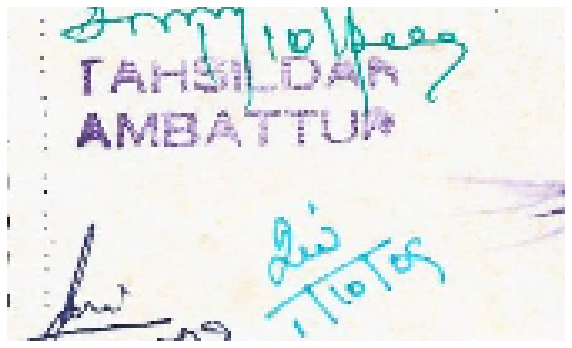

In [ ]:
xs=xc+215
ys=yc+430+v1
f6 = img[ys:ys+100,xs:xs+185]
print("Designation")
display_img(f6)


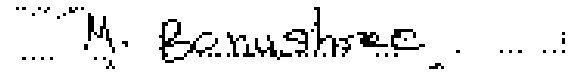

In [ ]:
img = f1
gray = cv2.cvtColor(f1, cv2.COLOR_BGR2GRAY)

roi = gray[0:300, 0:200]
_, threshold = cv2.threshold(roi, 150, 255, cv2.THRESH_BINARY)

display_img(threshold)

In [ ]:
from PIL import Image as im
data=im.fromarray(threshold)
data.save('f7.png')

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 4.6 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 2.0 MB 34.4 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 212 kB 46.3 MB/s 
     |████████████████████████████████| 256 kB 43.7 MB/s 
     |████████████████████████████████| 1.1 MB 43.6 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 144 kB 41.5 MB/s 
     |████████████████████████████████| 271 kB 48.0 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 11.1 MB 36.7 MB/s 
     |████████████████████████████████| 80 kB 9.2 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 4.0 M

In [ ]:
import gradio as gr
import requests
r = requests.post(url='https://hf.space/embed/nielsr/TrOCR-handwritten/+/api/predict/', json={"data":[gr.processing_utils.encode_url_or_file_to_base64("f7.png")]})
r.json()

{'avg_durations': [1.0269205085377195],
 'data': ['" Mr. Banushree,....'],
 'durations': [2.630265951156616],
 'flag_index': None,
 'updated_state': None}